
The majority of the countries finalize health insurance costs based on many factors such as age, number of people in families, etc. What should be the actual health insurance price for an individual or a family is an issue for many companies. Hence, one insurance company hired you as a data scientist to predict the health insurance cost for possible future customers. They have already collected samples required to perform all data analysis and machine learning tasks. Your task is to perform all data analysis steps and finally create a machine learning model which can predict the health insurance cost.

AIM:Predicting Health Insurance Price for an individual or family

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics  #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pyforest import *  

In [ ]:
!pip install pyforest

In [ ]:
raw_data=pd.read_excel("/content/Health_insurance_cost.xlsx")
data=raw_data.copy()

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

##Basic Exploration and Discreptive Statistics:

In [ ]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520



                                                                    



*   head() is used to observe how the data is looks like.
*   from above data we can say that there is no missing values.
*  mostly male persons are having health insurance. 




In [ ]:
data.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603




*  head() is used to observe how the data is looks like.


*  from above data we can say that there is no missing values. 



In [ ]:
data.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64



* data.isnull().sum() is used to summing the null values in each column
* from the above data set we can observe that age,BMI,health_insurance_price  columns has null values



In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


the above data types are showing correct

In [ ]:
data.describe(include="all")

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


## Dealing with Outliers:

<IPython.core.display.Javascript object>

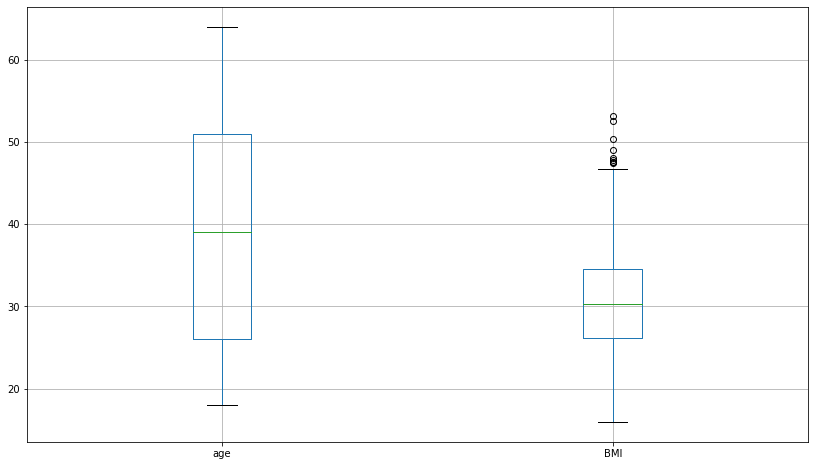

In [ ]:
data.boxplot(column= ['age', 'BMI'], figsize=(14, 8))
plt.show()

In [ ]:
data["BMI"]=data["BMI"].apply(lambda x:data.BMI.mean() if x>45 else x)

<IPython.core.display.Javascript object>

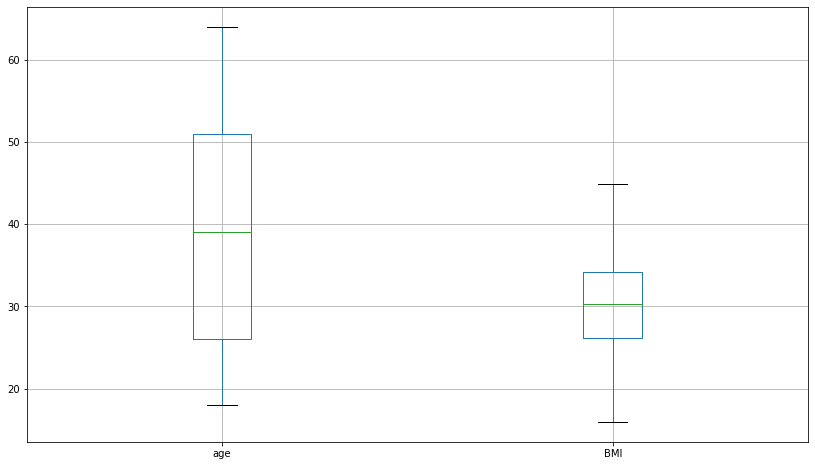

In [ ]:
data.boxplot(column= ['age', 'BMI'], figsize=(14, 8))
plt.show()

In [ ]:
data.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523


##Dealing with duplicates and missing values:

In [ ]:
data.drop_duplicates(inplace=True)

there is one duplicate row in the data set

<Axes: >

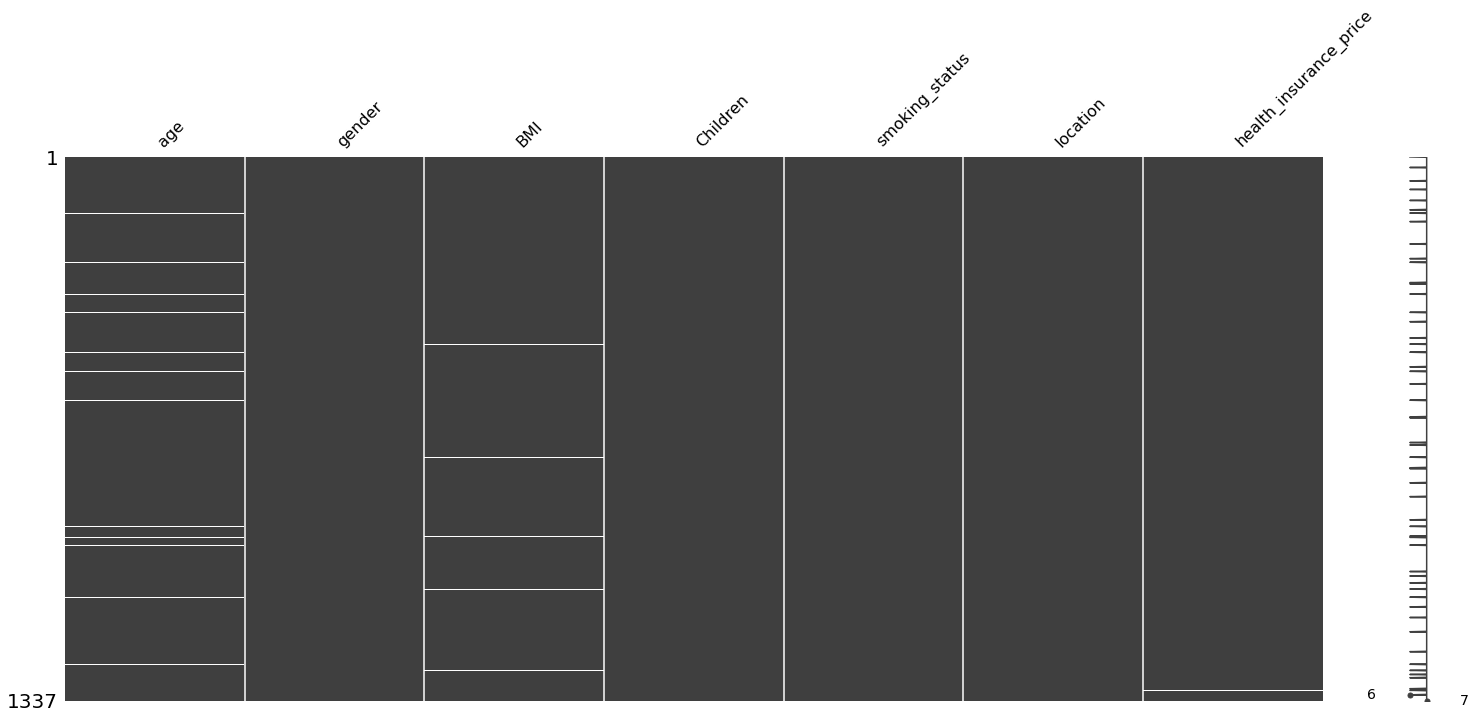

In [ ]:
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1309 non-null   float64
 1   gender                  1337 non-null   object 
 2   BMI                     1314 non-null   float64
 3   Children                1337 non-null   int64  
 4   smoking_status          1337 non-null   object 
 5   location                1337 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [ ]:
data.drop(data[data.health_insurance_price.isnull()==True].index,inplace=True)

<Axes: >

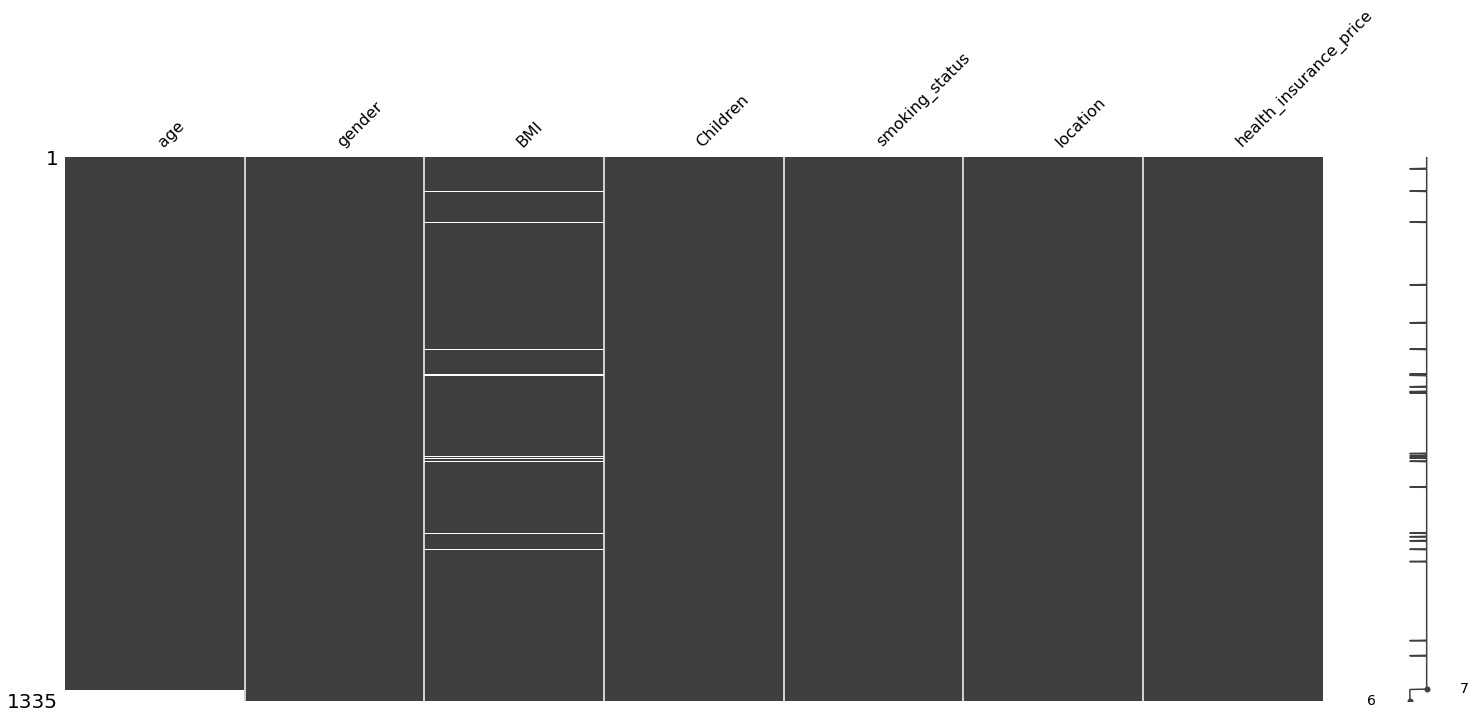

In [ ]:
sorted=data.sort_values('age')
msno.matrix(sorted)

####Imputing missing Values with mean_imputer:

In [ ]:
from sklearn.impute import SimpleImputer # importing simple imputer
health_mean = data.copy() # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='most_frequent') # using mean to impute the value
health_mean.iloc[:, :] = mean_imputer.fit_transform(health_mean)
health_mean

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.638217,0,yes,southwest,16884.92400
1,18.0,male,33.770000,1,no,southeast,1725.55230
2,28.0,male,33.000000,3,no,southeast,4449.46200
3,33.0,male,22.705000,0,no,northwest,21984.47061
4,32.0,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970000,3,no,northwest,10600.54830
1334,18.0,female,31.920000,0,no,northeast,2205.98080
1335,18.0,female,36.850000,0,no,southeast,1629.83350
1336,21.0,female,25.800000,0,no,southwest,2007.94500


In [ ]:
health_mean.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
health_mean.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,32.30,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523


In [ ]:
data=health_mean

##Data_Visualization for EDA:

In [ ]:
data.gender.value_counts()

male      674
female    661
Name: gender, dtype: int64

In [ ]:
data.smoking_status.value_counts()

no     1062
yes     273
Name: smoking_status, dtype: int64

In [ ]:
# Checking the count of clients based on gender 
fig=px.bar(data.gender.value_counts().reset_index().rename(columns={'index':'gender','gender':'Count'}),x='gender',y='Count',color='gender',text='Count')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5,title_text='<b> genders of the clients')


<IPython.core.display.Javascript object>

In [ ]:
data["BMI categories"] = None
for j, i in enumerate(data["BMI"]):
    if i < 19.5:
        data["BMI categories"][j] = "Under weight" 
    elif i >= 19.5 and i<= 25:
        data["BMI categories"][j] = "Normal weight" 
    elif i>25 and i<=30:
        data["BMI categories"][j] = "Over weight" 
    else:
      data["BMI categories"][j] = "Obese"

<ipython-input-41-292e311f1448>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-292e311f1448>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-292e311f1448>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-292e311f1448>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
data.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,BMI categories
0,19.0,female,32.30,0,yes,southwest,16884.9240,Obese
1,18.0,male,33.77,1,no,southeast,1725.5523,Obese


In [ ]:
data.rename(columns={'BMI categories':'BMI_categories'},inplace=True)

In [ ]:
fig=px.bar(data.BMI_categories.value_counts().reset_index().rename(columns={'index':'BMI_categories','BMI_categories':'Count'}),x='BMI_categories',y='Count',color='BMI_categories',text='Count')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5,title_text='<b> types of the clients based on BMI')

So obese persons has taken  more health insurances,next over weight persons followed by normal weight.under weight persons are least taken.

In [ ]:
fig=px.bar(data.age.value_counts().reset_index().rename(columns={'index':'age','age':'Count'}),x='age',y='Count',color='age',text='Count')
fig.update_traces(marker=dict(line=dict(color='#00FF00', width=2)))
fig.update_layout(title_x=0.5,title_text='<b> types of the clients based on age')

<IPython.core.display.Javascript object>

most of persons has taken health insurance at the age 18 and 19.
So insurance companies can target on teenagers and as well as obese and overweight persons

## Bivaraite Analysis:

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Obese'),
  Text(1, 0, 'Normal weight'),
  Text(2, 0, 'Over weight'),
  Text(3, 0, 'Under weight')])

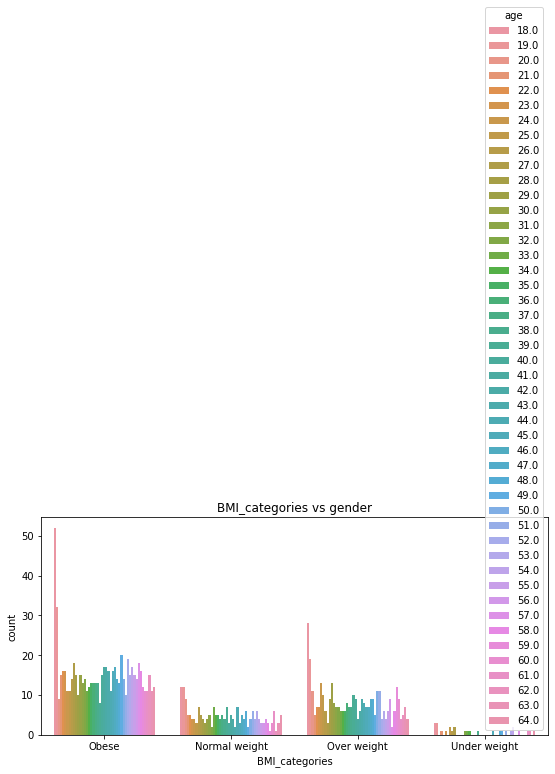

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["BMI_categories"],hue=data['age'],data=data)
plt.title("BMI_categories vs gender")    
plt.xticks(rotation=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

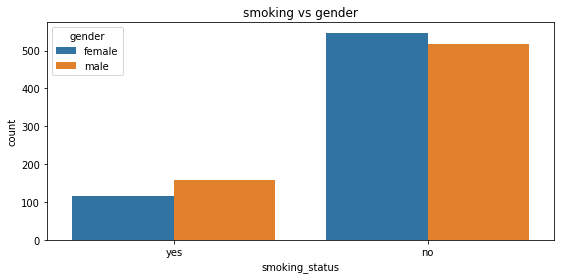

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["smoking_status"],hue=data['gender'],data=data)
plt.title("smoking vs gender")    
plt.xticks(rotation=0)


<IPython.core.display.Javascript object>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'southwest'),
  Text(1, 0, 'southeast'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast')])

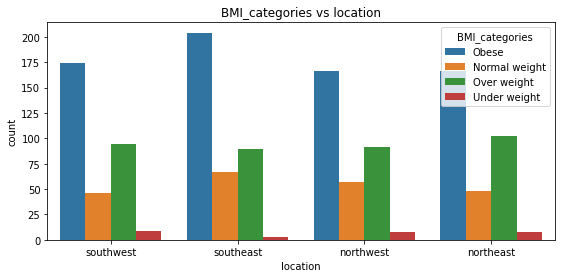

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.countplot(x=data["location"],hue=data['BMI_categories'],data=data)
plt.title("BMI_categories vs location")    
plt.xticks(rotation=0)

obese and over weight persons are mostly aged between 18 to 19.
###Insights:


* Insurance companies can target on teenagers and obese,overweight persons.  
* Obese persons are mostly located at southeast area of USA.so they can target southeast persons.



###Feature Engineering - It is the process of transforming the features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data.

It includes feature creation, Feature scaling,feature extraction and feature selection.

###Dealing with Categorical Features:

Encoding with LabelEncoder:

In [ ]:
# label encoding for the categorical variable
from sklearn.preprocessing import LabelEncoder

for col in ["gender","smoking_status", "location","BMI_categories"]:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
data.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,BMI_categories
0,19.0,0,32.30,0,1,3,16884.9240,1
1,18.0,1,33.77,1,0,2,1725.5523,1







##Skewness & Transformation:

<IPython.core.display.Javascript object>

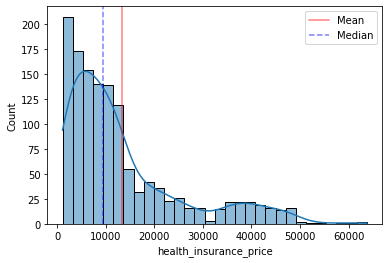

In [ ]:
sns.histplot(data = data['health_insurance_price'], kde = True)
plt.axvline(x=data.health_insurance_price.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=data.health_insurance_price.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

data is right skewed,to handle this skewness we have to go with log transformation,squreroot transformation,cube root transformation.

In [ ]:
data['health_insurance_price'] = np.log(data['health_insurance_price'])
data.head(2)

<IPython.core.display.Javascript object>

,age,gender,BMI,Children,smoking_status,location,health_insurance_price,BMI_categories
0,19.0,0,32.30,0,1,3,9.734176,1
1,18.0,1,33.77,1,0,2,7.453302,1


In [ ]:
data=data.iloc[:,:-1]

In [ ]:
data.head(2)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,32.30,0,1,3,9.734176
1,18.0,1,33.77,1,0,2,7.453302


<IPython.core.display.Javascript object>

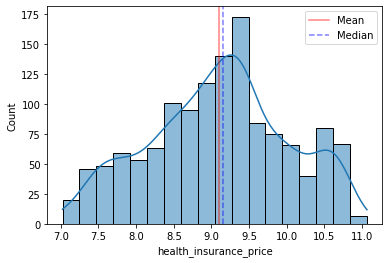

In [ ]:
sns.histplot(data = data['health_insurance_price'], kde = True)
plt.axvline(x=data.health_insurance_price.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=data.health_insurance_price.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

Log transformation can be used to reduce right/positive skewness.log transformation is strong transformation.

##Train&Test splitting:

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split # importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

#### Performing Transformation:

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.61569296, -0.99439772, -0.44250702, -0.90404786, -0.51371716,
         1.35711931],
       [ 1.63141538, -0.99439772,  1.57433798, -0.90404786, -0.51371716,
         0.4489718 ],
       [ 0.92919403, -0.99439772,  0.17345786, -0.90404786, -0.51371716,
         1.35711931],
       ...,
       [ 1.28030471,  1.00563385,  0.66798966, -0.90404786, -0.51371716,
        -0.45917571],
       [-1.45835858, -0.99439772,  1.57433798, -0.90404786, -0.51371716,
         0.4489718 ],
       [ 0.85897189,  1.00563385, -0.84728393, -0.90404786, -0.51371716,
         1.35711931]])

##Creating &Trainning The Model:

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

###Linear Regression:

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', linear_reg.coef_)

Coefficients:  [ 0.46780225 -0.05964179  0.08022348  0.11841796  0.61470397 -0.05340173]


In [ ]:
y_pred = linear_reg.predict(X_train)

In [ ]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.7498936686524086


In [ ]:
N=X.shape[0] # shape is 0
p=6 # number of features
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7487653694132466


It will always be smaller than R-squared value.

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

<IPython.core.display.Javascript object>

Mean of Residuals 1.4505330982696162e-15


It is very close to 0. Hence, all good.

<IPython.core.display.Javascript object>

<ipython-input-67-951c65e7fee2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_pred),bins=50)


<Axes: xlabel='health_insurance_price', ylabel='Density'>

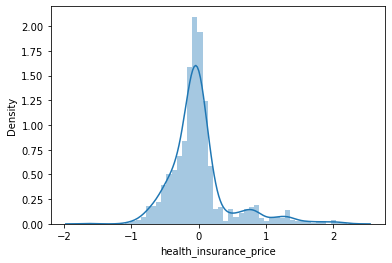

In [ ]:
sns.distplot((y_train-y_pred),bins=50)

In [ ]:
predictions = linear_reg.predict(X_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3336267949923144
MSE: 0.28862716392439564


<IPython.core.display.Javascript object>

RMSE: 0.5372403223180439


###Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
classification = DecisionTreeRegressor()
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9945 
Decision tree testing set accuracy: 0.7055 


desicion tree is overfitted  for the given data.

In [ ]:
# Create Decision Tree Regressor object
classification = DecisionTreeRegressor(criterion='squared_error', max_depth = 3)

# Train Decision Tree Regressor
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.7645 
Decision tree testing set accuracy: 0.7663 


###Support Vector Machines Regression:

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

0.480164785189036

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[-1.1903335 , -0.97361012,  0.03374665, -0.91021189,  2.00670918,
        -0.4503202 ],
       [-1.1903335 ,  1.02710518,  0.2677379 , -0.91021189, -0.49832831,
        -1.36168252],
       [-0.05407845, -0.97361012,  1.32333755, -0.91021189, -0.49832831,
         0.46104211],
       ...,
       [ 0.51404908, -0.97361012,  0.7726664 , -0.07503219,  2.00670918,
         1.37240443],
       [-1.04830162, -0.97361012,  0.6653471 , -0.91021189, -0.49832831,
         0.46104211],
       [ 0.01693749,  1.02710518, -0.04982166, -0.07503219,  2.00670918,
        -1.36168252]])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor  
Regressor= KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=2)  
Regressor.fit(X_train, y_train) 

KNeighborsRegressor()

In [ ]:
#Predicting the test set result  
y_pred= Regressor.predict(X_test)  

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

0.5031225550406629

Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.here rmse is more than 0.5 so this model is not fit for data.

###Insights:


*  by the above all ML algorithams,Linear regression is best suitable one.as the Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. 
* As desicion tree also gives the good results but the model is overfitted.

*   SVM  and KNN are not fit for this data.




